<a href="https://colab.research.google.com/github/Shrusti23/EE258_neural-networks/blob/master/MNIST_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import numpy as np

from keras.models import Model
from keras.layers import Input, Dense


In [0]:
learning_rate = 0.001
epochs=20
batch_size=64
display_step=20
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()


In [0]:
def load_data():
  (train_images,train_labels), (test_images,test_labels) = mnist.load_data()

  train_images = train_images.astype(np.object) 
  test_images = test_images.astype(np.object) 

  train_images = np.expand_dims(train_images, axis=-1)
  test_images = np.expand_dims(test_images, axis=-1)

  train_labels = to_categorical(train_labels,10)
  test_labels = to_categorical(test_labels,10)

  return train_images, train_labels, test_images, test_labels

#train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=1000000).batch(batch_size)
#test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)



In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=1000000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)


In [0]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer() # to convert numerical variables to categorical variables for multi-class classification
train_labels = label_binarizer.fit_transform(train_labels)

test_labels = label_binarizer.fit_transform(test_labels)


In [0]:
labels[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
test_images.shape


(10000, 28, 28)

In [0]:
test_labels.shape

(10000, 10)

In [0]:
def AlexNet_Model():
  inputs = keras.Input(shape=(28, 28, 1))

  #first convolution layer:
  conv1 = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='SAME', activation= tf.nn.relu)(inputs)
  pool1 = keras.layers.MaxPool2D(pool_size=(2, 2), padding='SAME')(conv1)
  norm1 = tf.nn.local_response_normalization(pool1, depth_radius=4, bias= 1.0, alpha= 0.001/ 9.0, beta=0.75)
  drop1 = keras.layers.Dropout(0.8)(norm1)

  #second convolution layer:
  conv2 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='SAME', activation= tf.nn.relu)(drop1)
  pool2 = keras.layers.MaxPool2D(pool_size=(2, 2), padding='SAME')(conv2)
  norm2 = tf.nn.local_response_normalization(pool2, depth_radius=4, bias= 1.0, alpha= 0.001/ 9.0, beta=0.75)
  drop2 = keras.layers.Dropout(0.8)(norm2)

  #third convolution layer:
  conv3 = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='SAME', activation= tf.nn.relu)(drop2)
  pool3 = keras.layers.MaxPool2D(pool_size=(2, 2), padding='SAME')(conv3)
  norm3 = tf.nn.local_response_normalization(pool3, depth_radius=4, bias= 1.0, alpha= 0.001/ 9.0, beta=0.75)
  drop3 = keras.layers.Dropout(0.8)(norm3)

  #fully connected layer:
  flat = keras.layers.Flatten()(drop3)
  dense1 = keras.layers.Dense(units=1024, activation=tf.nn.relu)(flat)
  dense2 = keras.layers.Dense(units=1024, activation=tf.nn.relu)(dense1)

  logits = keras.layers.Dense(units=10)(dense2)
  return keras.Model(inputs=inputs, outputs=logits)

model = AlexNet_Model()
model.summary()
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist= model.fit(train_images, train_labels,
                batch_size=batch_size,
                epochs=20,
                verbose=1,
                validation_data=(test_images, test_labels))
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
tf_op_layer_LRN_18 (TensorFl [(None, 14, 14, 64)]      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 128)         0   

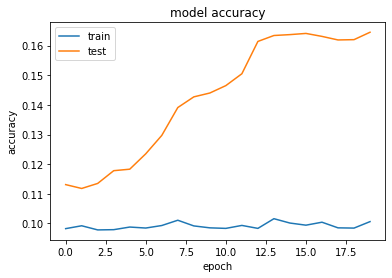

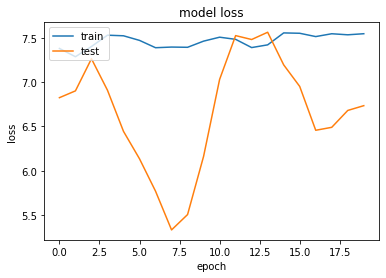

In [0]:
    import matplotlib.pyplot as plt
    plt.plot(hist.history['accuracy']) 
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy') 
    plt.ylabel('accuracy') 
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
! pip install virtualenv

!pip install --upgrade wandb

import wandb

wandb.init(sync_tensorboard=True)

Requirement already up-to-date: wandb in /usr/local/lib/python3.6/dist-packages (0.8.32)


W&B Run: https://app.wandb.ai/shrusti/uncategorized/runs/2jt95ry3